<a href="https://colab.research.google.com/github/Boubacar5400/Mon_projet_ML/blob/main/Etude_des_fonctions_d'activ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Etude des fonctions d'activations en réseau neuronnes**

**Simulation des fonctions d'activations**

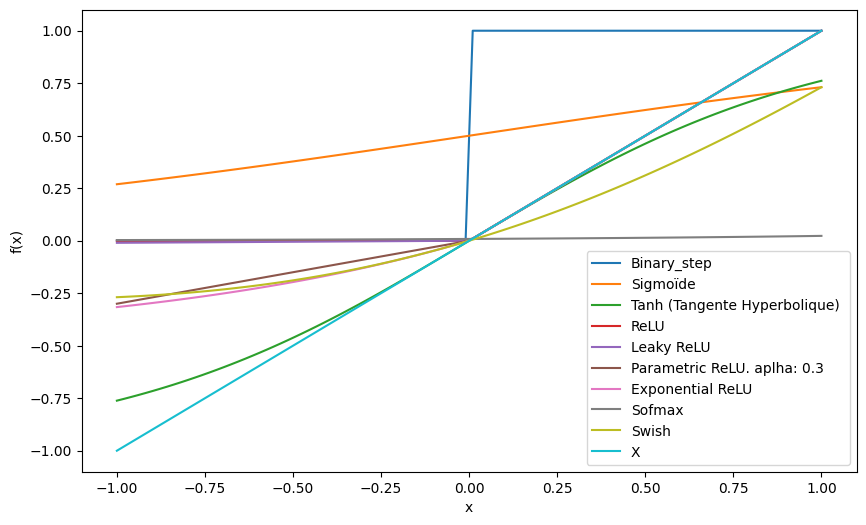

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Définition des fonctions d'activation
def Binary_step(x):
    return np.where(x > 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, x * alpha)

def elu(x, alpha=0.5):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def swish (x):
    swi_x = x/(1+np.exp(-x))
    return swi_x

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()


# Création de la plage de valeurs pour x
x = np.linspace(-1, 1, 100)

# Calcul des valeurs des fonctions d'activation
y_Binary_step= Binary_step(x)
y_sigmoid = sigmoid(x)
y_tanh = tanh(x)
y_relu = relu(x)
y_leaky_relu = leaky_relu(x)
y_prelu = leaky_relu(x, 0.3)
y_elu = elu(x)
y_softmax = softmax(x)
y_swish = swish(x)
# Création du graphique
plt.figure(figsize=(10, 6))
plt.plot(x, y_Binary_step, label="Binary_step")
plt.plot(x, y_sigmoid, label="Sigmoïde")
plt.plot(x, y_tanh, label="Tanh (Tangente Hyperbolique) ")
plt.plot(x, y_relu, label="ReLU")
plt.plot(x, y_leaky_relu, label="Leaky ReLU")
plt.plot(x, y_prelu, label="Parametric ReLU. aplha: 0.3")
plt.plot(x, y_elu, label="Exponential ReLU")
plt.plot(x, y_softmax, label="Sofmax")
plt.plot(x, y_swish, label="Swish")
plt.plot(x, x, label="X")

# Ajout de légendes et titre
#plt.title("Comparaison des Fonctions d'Activation en Deep Learning")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(False)
plt.show()

Comparaison des fonctions d'activation dans un réseau neuronal
Nous allons implémenter un réseau neuronal simple avec des données simuler et nous allons expérimenter différentes fonctions d'activation à savoir: Sigmoid, Tanh, ReLU, Leaky ReLU, PReLU, ELU, et Swish.
Pour l'évaluation, nous allons mesurer les performances en termes de précision et de temps d'apprentissage.

In [2]:
import numpy as np

# Définir les paramètres de simulation
nb_samples = 1000
nb_features = 10

# Générer des données aléatoires pour les caractéristiques
X = np.random.randn(nb_samples, nb_features)

# Générer des étiquettes pour la classification binaire
y = np.random.randint(2, size=nb_samples)

# Afficher les dimensions des données générées
print("Dimensions des caractéristiques (X) :", X.shape)
print("Dimensions des étiquettes (y) :", y.shape)


Dimensions des caractéristiques (X) : (1000, 10)
Dimensions des étiquettes (y) : (1000,)


In [3]:
import time
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import time

# Fixer la graine aléatoire pour la reproductibilité
np.random.seed(42)
tf.random.set_seed(42)
# Définir les paramètres de simulation
nb_samples = 1000
nb_features = 10

# Générer des données aléatoires pour les caractéristiques
X = np.random.randn(nb_samples, nb_features)

# Générer des étiquettes pour la classification binaire
y = np.random.randint(2, size=nb_samples)

# Afficher les dimensions des données générées
print("Dimensions des caractéristiques (X) :", X.shape)
print("Dimensions des étiquettes (y) :", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mise à l'échelle des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Définir une fonction pour créer un modèle avec différentes couches d'activations
def create_model(activation):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(10, input_shape=(10,)),
    ])

    if activation == 'leaky_relu':
        model.add(tf.keras.layers.LeakyReLU())
    elif activation == 'prelu':
        model.add(tf.keras.layers.PReLU())
    else:
        model.add(tf.keras.layers.Dense(10, activation=activation))

    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Liste des fonction d'activation à tester
activations = ['sigmoid', 'tanh', 'relu', 'leaky_relu', 'prelu', 'elu', 'swish']

# Entraînement et évaluation des modèles avec différentes fonctions d'activation
for activation in activations:
    start_time = time.time()
    model = create_model(activation)
    model.fit(X_train, y_train, epochs=100, verbose=0)
    training_time = time.time() - start_time
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Fonction d'activation: {activation}, Accuracy: {accuracy:.4f}, Loss: {loss:.4f}, Temps d'entrainement : {training_time:.2f} seconds")


Dimensions des caractéristiques (X) : (1000, 10)
Dimensions des étiquettes (y) : (1000,)
Fonction d'activation: sigmoid, Accuracy: 0.4500, Loss: 0.7052, Temps d'entrainement : 5.16 seconds
Fonction d'activation: tanh, Accuracy: 0.5050, Loss: 0.7114, Temps d'entrainement : 5.46 seconds
Fonction d'activation: relu, Accuracy: 0.5050, Loss: 0.7149, Temps d'entrainement : 5.89 seconds
Fonction d'activation: leaky_relu, Accuracy: 0.4750, Loss: 0.7180, Temps d'entrainement : 5.99 seconds
Fonction d'activation: prelu, Accuracy: 0.5100, Loss: 0.7341, Temps d'entrainement : 6.78 seconds
Fonction d'activation: elu, Accuracy: 0.5250, Loss: 0.6965, Temps d'entrainement : 5.08 seconds
Fonction d'activation: swish, Accuracy: 0.5250, Loss: 0.7186, Temps d'entrainement : 6.24 seconds


Les résultats sont présentés sur le tableau ci-dessous. Nous avons entrainé et évalué notre modèle utilisant à chaque fois une fonction d’activation. Nous avons noté l’accuracy, la perte (le loss) et aussi le temps nécessaire à l’entrainement.

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
def create_deep_network(n_layers=10, activation='relu', initializer='glorot_uniform'):
    inputs = Input(shape=(10,))
    x = inputs
    for _ in range(n_layers):
        x = Dense(10, activation=activation, kernel_initializer=initializer)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

**Expérimentation avec différents Initialisateurs et Fonctions d'Activation**

Pour explorer la disparition du gradient, nous allons utiliser la fonction d'activation sigmoïde ou tanh avec un réseau profond (par exemple, nombre de couches cachées ègal à 10).
Nous allons définir la fonction d'activation ainsi que sa dérivée et calculer la magnitude du gradient à mesure que nous remontons dans les couches du réseau (de la sortie vers l'entrée)

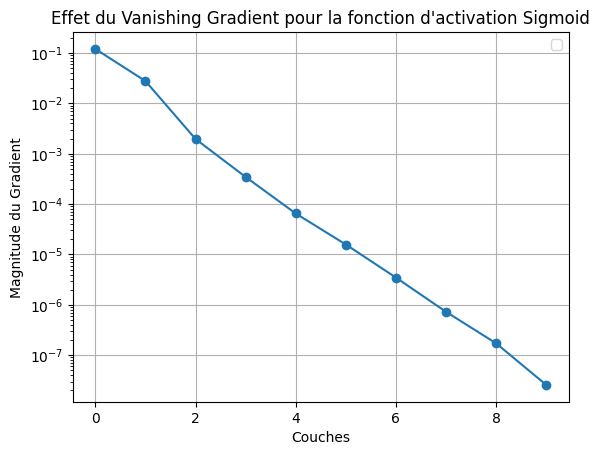

In [6]:
import numpy as np
import matplotlib.pyplot as plt
# Définition de la fonction d'activation sigmoïde et de sa dérivée
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def derivative_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))
# Simulation de l'effet du vanishing gradient sur 10 couches
layers = 10
gradient_magnitude = np.zeros(layers)
initial_gradient = 1  # Gradient initial pour la sortie

for i in range(layers):
    x = np.random.randn()  # Entrée aléatoire pour simuler l'activation
    grad = derivative_sigmoid(x)
    initial_gradient *= grad  # Mise à jour du gradient à travers les couches
    gradient_magnitude[i] = initial_gradient

# Affichage du graphique
plt.plot(gradient_magnitude, marker='o')
plt.title('Effet du Vanishing Gradient pour la fonction d\'activation Sigmoid')
plt.xlabel('Couches')
plt.ylabel('Magnitude du Gradient')
plt.yscale('log')  # Échelle logarithmique
plt.grid(True)
plt.legend()
plt.show()

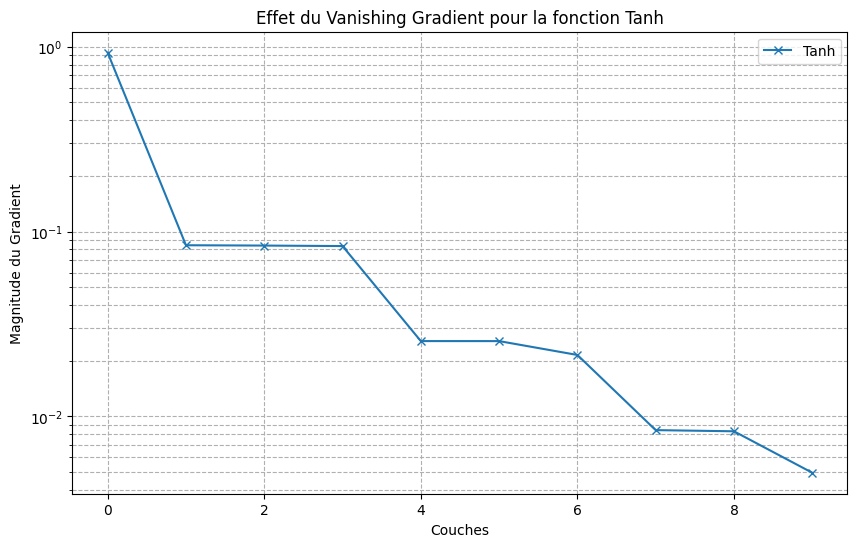

In [7]:
# Définition de la fonction d'activation tanh et sa dérivée
def tanh(x):
    return np.tanh(x)
def derivative_tanh(x):
    return 1 - tanh(x)**2
# Simulation de l'effet du vanishing gradient pour tanh et ReLU
layers = 10
gradient_magnitude_tanh = np.zeros(layers)
initial_gradient_tanh = 1  # Gradient initial pour la sortie tanh

for i in range(layers):
    x = np.random.randn()  # Entrée aléatoire pour simuler l'activation
    grad_tanh = derivative_tanh(x)
    # Mise à jour du gradient à travers les couches pour tanh et ReLU
    initial_gradient_tanh *= grad_tanh
    gradient_magnitude_tanh[i] = initial_gradient_tanh

# Affichage du graphique
plt.figure(figsize=(10, 6))
plt.plot(gradient_magnitude_tanh, marker='x', label='Tanh')
plt.title('Effet du Vanishing Gradient pour la fonction Tanh')
plt.xlabel('Couches')
plt.ylabel('Magnitude du Gradient')
plt.yscale('log')  # Échelle logarithmique
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

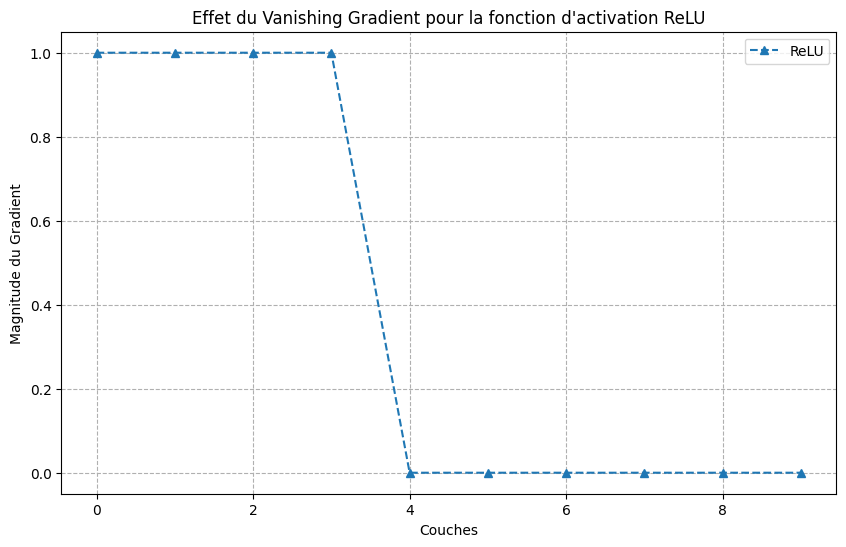

In [8]:
# Définition de la fonction d'activation ReLU et sa dérivée
def relu(x):
    return np.maximum(0, x)
def derivative_relu(x):
    return np.where(x > 0, 1, 0)
# Simulation de l'effet du vanishing gradient pour ReLU
layers = 10
gradient_magnitude_relu = np.zeros(layers)
initial_gradient_relu = 1  # Gradient initial pour la sortie ReLU
for i in range(layers):
    x = np.random.randn()  # Entrée aléatoire pour simuler l'activation
    grad_relu = derivative_relu(x)
    # Mise à jour du gradient à travers les couches pour ReLU
    initial_gradient_relu *= grad_relu
    gradient_magnitude_relu[i] = initial_gradient_relu

# Ajustement pour une meilleure visualisation, en particulier pour ReLU
# Nous allons utiliser une échelle linéaire au lieu d'une échelle logarithmique pour mieux voir la ReLU

plt.figure(figsize=(10, 6))
plt.plot(gradient_magnitude_relu, marker='^', label='ReLU', linestyle='--')
plt.title('Effet du Vanishing Gradient pour la fonction d\'activation ReLU')
plt.xlabel('Couches')
plt.ylabel('Magnitude du Gradient')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()



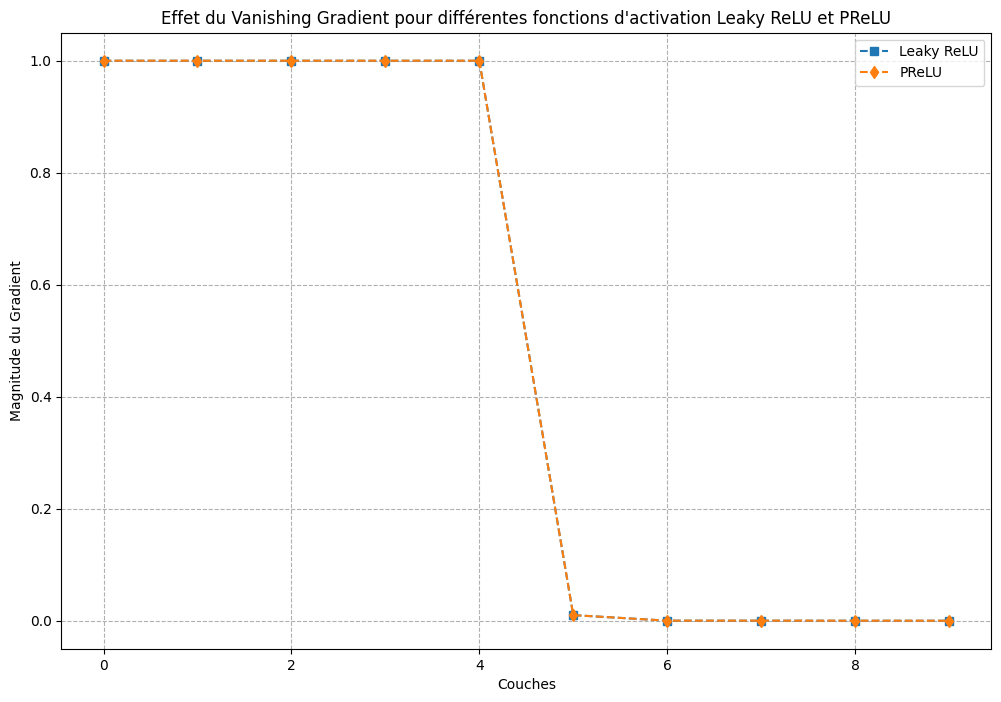

In [9]:
# Définition des variantes de ReLU et leurs dérivées
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, x * alpha)

def derivative_leaky_relu(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

def prelu(x, alpha=0.01):
    return np.where(x > 0, x, x * alpha)

def derivative_prelu(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

def elu(x, alpha=1):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def derivative_elu(x, alpha=1):
    return np.where(x > 0, 1, elu(x, alpha) + alpha)

# Simulation de l'effet du vanishing gradient pour Leaky ReLU, PReLU, et ELU
gradient_magnitude_leaky_relu = np.zeros(layers)
gradient_magnitude_prelu = np.zeros(layers)
gradient_magnitude_elu = np.zeros(layers)
initial_gradient_leaky_relu = initial_gradient_prelu = initial_gradient_elu = 1  # Gradient initial

for i in range(layers):
    x = np.random.randn()  # Entrée aléatoire pour simuler l'activation
    grad_leaky_relu = derivative_leaky_relu(x)
    grad_prelu = derivative_prelu(x)
    grad_elu = derivative_elu(x)

    # Mise à jour du gradient à travers les couches pour chaque variante
    initial_gradient_leaky_relu *= grad_leaky_relu
    initial_gradient_prelu *= grad_prelu
    initial_gradient_elu *= grad_elu

    gradient_magnitude_leaky_relu[i] = initial_gradient_leaky_relu
    gradient_magnitude_prelu[i] = initial_gradient_prelu
    gradient_magnitude_elu[i] = initial_gradient_elu

# Affichage du graphique avec les variantes de ReLU
plt.figure(figsize=(12, 8))
# plt.plot(gradient_magnitude, marker='o', label='Sigmoïde', linestyle='--')
# plt.plot(gradient_magnitude_tanh, marker='x', label='Tanh', linestyle='--')
#plt.plot(gradient_magnitude_relu, marker='^', label='ReLU', linestyle='--')
plt.plot(gradient_magnitude_leaky_relu, marker='s', label='Leaky ReLU', linestyle='--')
plt.plot(gradient_magnitude_prelu, marker='d', label='PReLU', linestyle='--')
#plt.plot(gradient_magnitude_elu, marker='*', label='ELU', linestyle='--')
plt.title('Effet du Vanishing Gradient pour différentes fonctions d\'activation Leaky ReLU et PReLU')
plt.xlabel('Couches')
plt.ylabel('Magnitude du Gradient')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

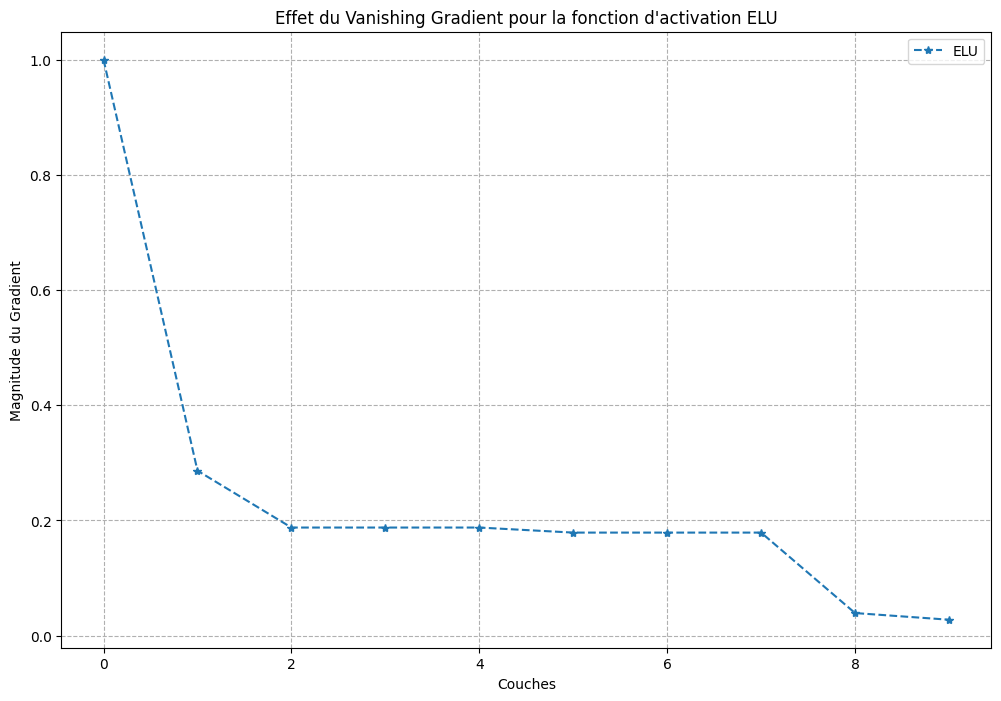

In [10]:
# Définition des variantes de ReLU et leurs dérivées
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, x * alpha)

def derivative_leaky_relu(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

def prelu(x, alpha=0.01):
    return np.where(x > 0, x, x * alpha)

def derivative_prelu(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

def elu(x, alpha=1):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def derivative_elu(x, alpha=1):
    return np.where(x > 0, 1, elu(x, alpha) + alpha)

# Simulation de l'effet du vanishing gradient pour Leaky ReLU, PReLU, et ELU
gradient_magnitude_leaky_relu = np.zeros(layers)
gradient_magnitude_prelu = np.zeros(layers)
gradient_magnitude_elu = np.zeros(layers)
initial_gradient_leaky_relu = initial_gradient_prelu = initial_gradient_elu = 1  # Gradient initial

for i in range(layers):
    x = np.random.randn()  # Entrée aléatoire pour simuler l'activation
    grad_leaky_relu = derivative_leaky_relu(x)
    grad_prelu = derivative_prelu(x)
    grad_elu = derivative_elu(x)

    # Mise à jour du gradient à travers les couches pour chaque variante
    initial_gradient_leaky_relu *= grad_leaky_relu
    initial_gradient_prelu *= grad_prelu
    initial_gradient_elu *= grad_elu

    gradient_magnitude_leaky_relu[i] = initial_gradient_leaky_relu
    gradient_magnitude_prelu[i] = initial_gradient_prelu
    gradient_magnitude_elu[i] = initial_gradient_elu

# Affichage du graphique avec les variantes de ReLU
plt.figure(figsize=(12, 8))
# plt.plot(gradient_magnitude, marker='o', label='Sigmoïde', linestyle='--')
# plt.plot(gradient_magnitude_tanh, marker='x', label='Tanh', linestyle='--')
#plt.plot(gradient_magnitude_relu, marker='^', label='ReLU', linestyle='--')
#plt.plot(gradient_magnitude_leaky_relu, marker='s', label='Leaky ReLU', linestyle='--')
#plt.plot(gradient_magnitude_prelu, marker='d', label='PReLU', linestyle='--')
plt.plot(gradient_magnitude_elu, marker='*', label='ELU', linestyle='--')
plt.title('Effet du Vanishing Gradient pour la fonction d\'activation ELU')
plt.xlabel('Couches')
plt.ylabel('Magnitude du Gradient')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

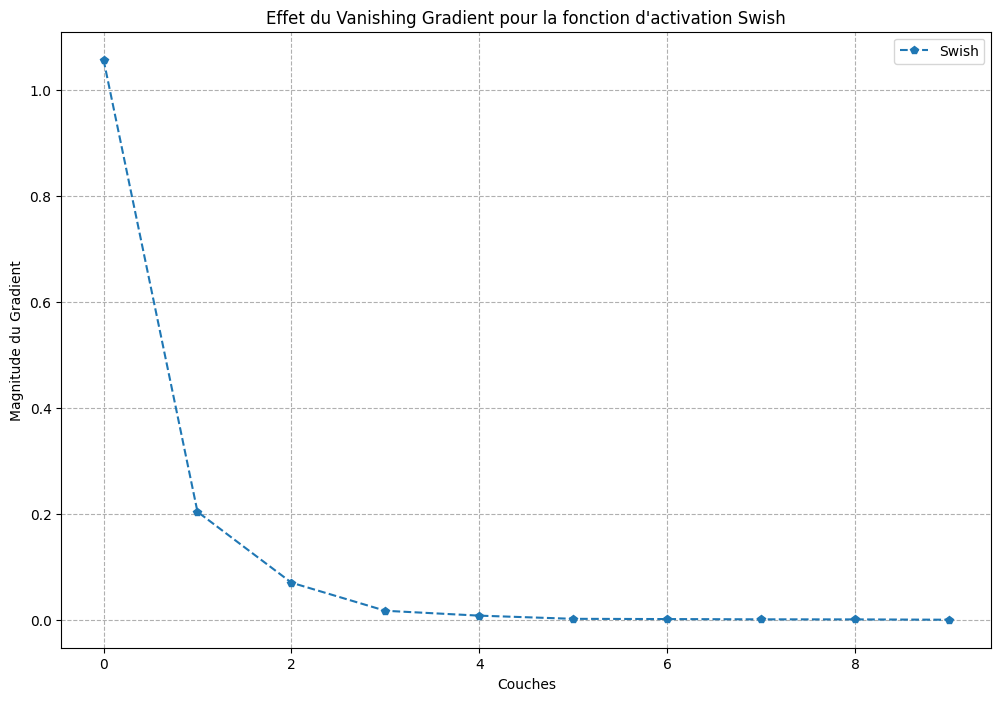

In [11]:
# Définition de la fonction Swish et de sa dérivée
def swish(x, beta=1):
    return x * sigmoid(beta * x)

def derivative_swish(x, beta=1):
    return beta * swish(x, beta) + sigmoid(beta * x) * (1 - beta * swish(x, beta))

# Simulation de l'effet du vanishing gradient pour Swish
gradient_magnitude_swish = np.zeros(layers)
initial_gradient_swish = 1  # Gradient initial pour Swish

for i in range(layers):
    x = np.random.randn()  # Entrée aléatoire pour simuler l'activation
    grad_swish = derivative_swish(x)
    initial_gradient_swish *= grad_swish
    gradient_magnitude_swish[i] = initial_gradient_swish

# Affichage du graphique avec Swish ajoutée
plt.figure(figsize=(12, 8))
plt.plot(gradient_magnitude_swish, marker='p', label='Swish', linestyle='--')
plt.title('Effet du Vanishing Gradient pour la fonction d\'activation Swish')
plt.xlabel('Couches')
plt.ylabel('Magnitude du Gradient')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

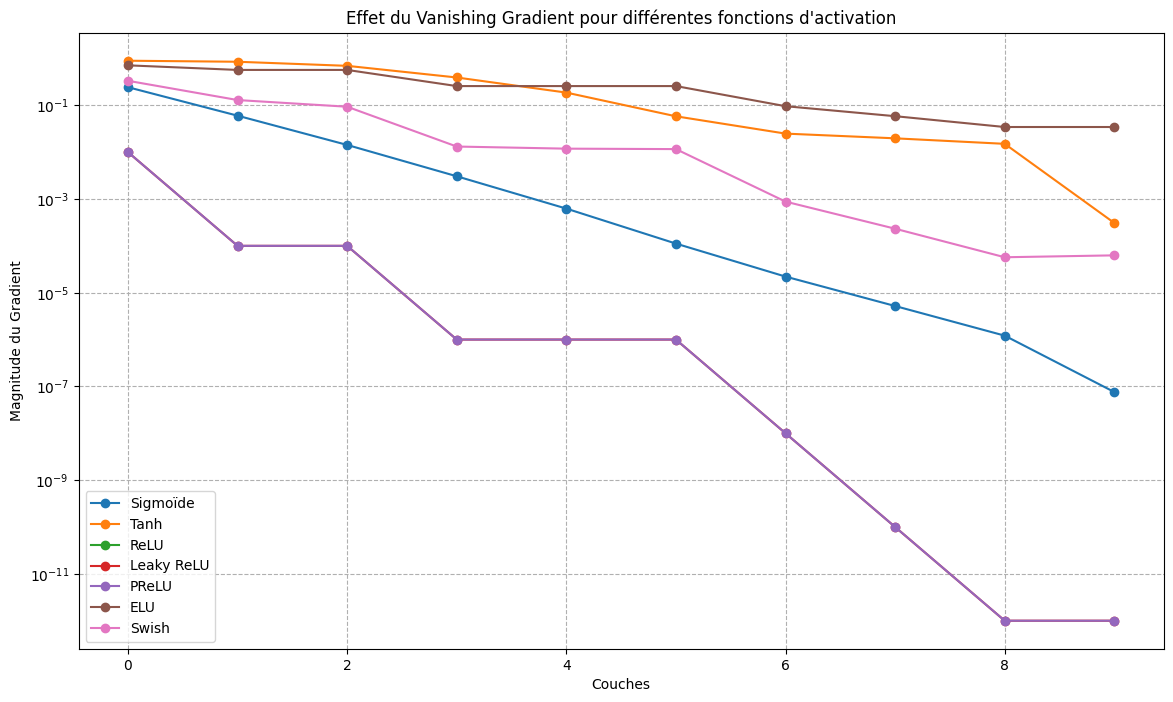

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction d'activation sigmoïde et sa dérivée
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def derivative_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Tanh et sa dérivée
def tanh(x):
    return np.tanh(x)

def derivative_tanh(x):
    return 1 - np.tanh(x)**2

# ReLU et sa dérivée
def relu(x):
    return np.maximum(0, x)

def derivative_relu(x):
    return np.where(x > 0, 1, 0)

# Leaky ReLU et sa dérivée
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, x * alpha)

def derivative_leaky_relu(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

# PReLU et sa dérivée
def prelu(x, alpha=0.01):
    return np.where(x > 0, x, x * alpha)

def derivative_prelu(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

# ELU et sa dérivée
def elu(x, alpha=1):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def derivative_elu(x, alpha=1):
    return np.where(x > 0, 1, elu(x, alpha) + alpha)

# Swish et sa dérivée
def swish(x, beta=1):
    return x * sigmoid(beta * x)

def derivative_swish(x, beta=1):
    return beta * swish(x, beta) + sigmoid(beta * x) * (1 - beta * swish(x, beta))

# Simulation de l'effet du vanishing gradient pour chaque fonction d'activation
layers = 10
activations = ['Sigmoïde', 'Tanh', 'ReLU', 'Leaky ReLU', 'PReLU', 'ELU', 'Swish']
gradient_magnitudes = np.zeros((len(activations), layers))

for i in range(layers):
    x = np.random.randn()  # Entrée aléatoire pour simuler l'activation
    gradients = [
        derivative_sigmoid(x),
        derivative_tanh(x),
        derivative_relu(x),
        derivative_leaky_relu(x),
        derivative_prelu(x),
        derivative_elu(x),
        derivative_swish(x)
    ]

    # Mise à jour du gradient à travers les couches pour chaque fonction
    if i == 0:
        gradient_magnitudes[:, i] = gradients
    else:
        gradient_magnitudes[:, i] = gradient_magnitudes[:, i-1] * gradients

# Affichage du graphique
plt.figure(figsize=(14, 8))
for i, activation in enumerate(activations):
    plt.plot(gradient_magnitudes[i], marker='o', label=activation)

plt.title('Effet du Vanishing Gradient pour différentes fonctions d\'activation')
plt.xlabel('Couches')
plt.ylabel('Magnitude du Gradient')
plt.yscale('log')  # Échelle logarithmique pour mieux visualiser les changements
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()
